In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observation=1000
xs=np.random.uniform(-10,10,(observation,1))
zs=np.random.uniform(-10,10,(observation,1))

gen_input=np.column_stack((xs,zs))
noise=np.random.uniform(-0.1,0.1,(observation,1))
gen_target=2*xs-3*zs+5+noise

np.savez('TF_intro',inputs=gen_input, targets=gen_target)


In [3]:
training_data=np.load('TF_intro.npz')

In [8]:
input_size=2
output_size=1

model=tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])
model.compile(optimizer='sgd',loss='mean_squared_error')

model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)

Epoch 1/100
32/32 - 0s - loss: 44.7430
Epoch 2/100
32/32 - 0s - loss: 4.0135
Epoch 3/100
32/32 - 0s - loss: 1.1590
Epoch 4/100
32/32 - 0s - loss: 0.3248
Epoch 5/100
32/32 - 0s - loss: 0.0886
Epoch 6/100
32/32 - 0s - loss: 0.0262
Epoch 7/100
32/32 - 0s - loss: 0.0098
Epoch 8/100
32/32 - 0s - loss: 0.0052
Epoch 9/100
32/32 - 0s - loss: 0.0039
Epoch 10/100
32/32 - 0s - loss: 0.0035
Epoch 11/100
32/32 - 0s - loss: 0.0034
Epoch 12/100
32/32 - 0s - loss: 0.0035
Epoch 13/100
32/32 - 0s - loss: 0.0035
Epoch 14/100
32/32 - 0s - loss: 0.0034
Epoch 15/100
32/32 - 0s - loss: 0.0034
Epoch 16/100
32/32 - 0s - loss: 0.0034
Epoch 17/100
32/32 - 0s - loss: 0.0034
Epoch 18/100
32/32 - 0s - loss: 0.0034
Epoch 19/100
32/32 - 0s - loss: 0.0034
Epoch 20/100
32/32 - 0s - loss: 0.0035
Epoch 21/100
32/32 - 0s - loss: 0.0034
Epoch 22/100
32/32 - 0s - loss: 0.0034
Epoch 23/100
32/32 - 0s - loss: 0.0034
Epoch 24/100
32/32 - 0s - loss: 0.0034
Epoch 25/100
32/32 - 0s - loss: 0.0034
Epoch 26/100
32/32 - 0s - loss: 0

In [10]:
## extract weight and bias

In [18]:
weight=model.layers[0].get_weights()[0]
bias=model.layers[0].get_weights()[1]
print(weight)
print(bias)

[[ 2.0003862]
 [-2.9992921]]
[4.999085]


In [24]:
out=model.predict_on_batch(training_data['inputs'])

/home/sanyam/anaconda3/envs/py3-tf/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


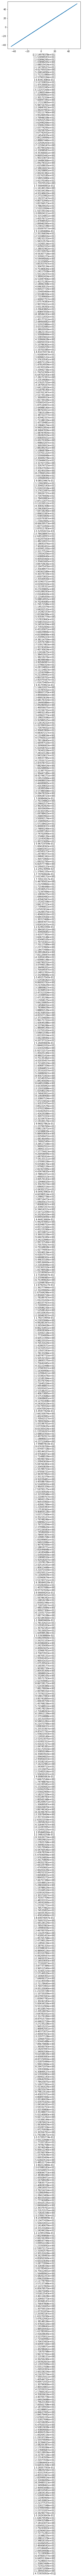

In [27]:
plt.plot(out,np.squeeze(gen_target))
plt.xlabel(out)
plt.xlabel(gen_target)
plt.show()